<a href="https://colab.research.google.com/github/dhruv025/titanic-survival/blob/master/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing dataset using pandas library.
df1 = pd.read_csv('drive/My Drive/titanic.csv')

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df1.shape

(891, 12)

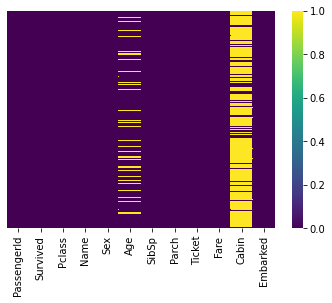

In [ ]:
#In this seaborn is used to see which column has how many no. of null values.
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

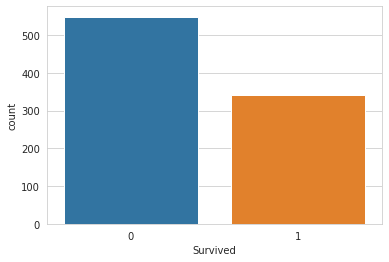

In [ ]:
#this bar plot tells how many person are survived(1) and not survived(0) in titanic accident
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df1)

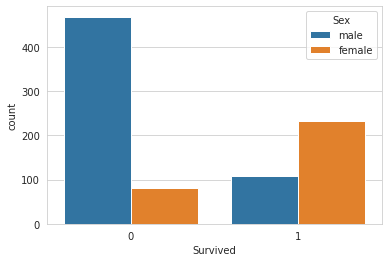

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df1)

In [ ]:
df2 = df1.copy()

In [ ]:
#filling the null values in Age column with the next record.
df2['Age'].fillna(method='ffill',inplace=True)

In [ ]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

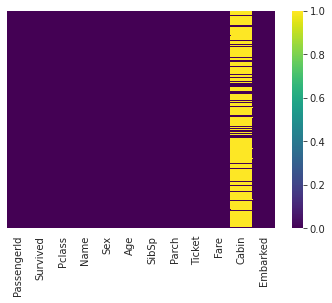

In [ ]:
#this heat map shows that now Age column has no null values.
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
#dropping the Cabin column as it has many null values.
df3 = df2.drop(['Cabin'],axis=1)

In [ ]:
df4 = df3.dropna()

In [ ]:
df4.shape

(889, 11)

In [ ]:
#dealing with categorical values.
Sex = pd.get_dummies(df4['Sex'])

In [ ]:
Sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
#to avoid dummy variable trap dropping one column 
Sex.drop(['female'],axis=1,inplace=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
Embarked = pd.get_dummies(df4['Embarked'],drop_first=True)

In [ ]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
df5 = df4.drop(['Name','Sex','Ticket','Embarked'],axis=1)

In [ ]:
df5.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df6 = pd.concat([df5,Sex,Embarked],axis=1)

In [ ]:
df6.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#independent variables
X = df6.drop(['Survived'],axis=1)
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#dependent variable
y = df6['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#training and predicting on dataset using classifiers
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,pred)
cm

array([[158,  10],
       [ 79,  20]])

In [ ]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.6666666666666666

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       168
           1       0.67      0.20      0.31        99

    accuracy                           0.67       267
   macro avg       0.67      0.57      0.55       267
weighted avg       0.67      0.67      0.61       267



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
pred = clf_dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[133,  35],
       [ 30,  69]])

In [ ]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.7565543071161048

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       168
           1       0.66      0.70      0.68        99

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



In [ ]:
from sklearn.svm import SVC

In [ ]:
clf_svc = SVC()
clf_svc.fit(X_train,y_train)
pred = clf_svc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[166,   2],
       [ 86,  13]])

In [ ]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.6704119850187266

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       168
           1       0.87      0.13      0.23        99

    accuracy                           0.67       267
   macro avg       0.76      0.56      0.51       267
weighted avg       0.74      0.67      0.58       267



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train,y_train)
pred = clf_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[153,  15],
       [ 29,  70]])

In [ ]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.8352059925093633